# Imports

In [1]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
import pprint

# Functions

### Rastrigin

In [2]:
# x ∈ [-5,12; 5,12], x ∈ R²
# global minimum: (0, 0)

def rastrigin(x, y):
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2* np.pi * y)

RASTRIGIN_MIN = rastrigin(0, 0)

In [3]:
def grad_rastrigin(x, y):
    return (
        2 * (x + 10 * np.pi * np.sin(2 * np.pi * x)),
        2 * (y + 10 * np.pi * np.sin(2 * np.pi * y)),
    )

### Griewank

In [4]:
# x ∈ [-5; 5], x ∈ R²
# global minimum: (0, 0)

def griewank(x, y):
    return (x**2 + y**2) / 4000 - np.cos(x) * np.cos(y / np.sqrt(2)) + 1

GRIEWANK_MIN = griewank(0, 0)

In [5]:
def grad_griewank(x, y):
    return (
        x / 2000 + np.cos(y / np.sqrt(2)) * np.sin(x),
        y / 2000 + (np.cos(x) * np.sin(y / np.sqrt(2))) / np.sqrt(2),
    )

# Optimizer

In [6]:
class GradientDescent:
    
    def __init__(self, fun, grad, x, y, lr, t):
        self.start = (x, y)
        self.fun = fun
        self.grad = grad
        self.x = x
        self.y = y
        self.lr = lr
        self.t = t
        self.path = [(x, y)]
        
    def step(self):
        dx, dy = self.grad(self.x, self.y)
        dx, dy = np.clip(dx, 10**-100, 10**100), np.clip(dy, 10**-100, 10**100)
        self.x, self.y = self.x - self.x * dx * self.lr, self.y - self.y * dy * self.lr
        self.path.append((self.x, self.y))
        
    def run(self):
        for _ in range(self.t):
            self.step()
            
        return self.x, self.y


# Visualisation

In [7]:
def plot(name, func, grad, domain, resolution, start, lr, t):
    x = np.arange(domain[0], domain[1], resolution)
    y = np.arange(domain[0], domain[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(projection="3d", computed_zorder=False)
    ax.set_title(name)

    # Set axes label
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    optimizer = GradientDescent(func, grad, start[0], start[1], lr, t)
    optimizer.run()

    ax.plot_surface(X, Y, Z, cmap="viridis")

    ax.scatter(
        [p[0] for p in optimizer.path],
        [p[1] for p in optimizer.path],
        [func(p[0], p[1]) for p in optimizer.path],
        color="magenta",
    )

    plt.show()

### Rastrigin

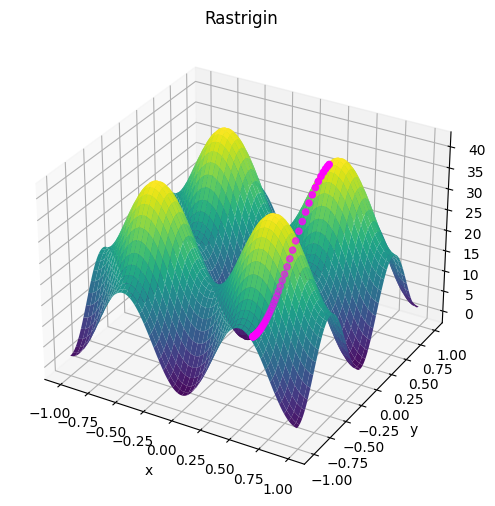

In [8]:
func = rastrigin
grad = grad_rastrigin
domain = (-1, 1)
resolution = 0.01
start = (0.45, 0.45)
lr = 0.001
t = 100

plot("Rastrigin", func, grad, domain, resolution, start, lr, t)

### Griewank

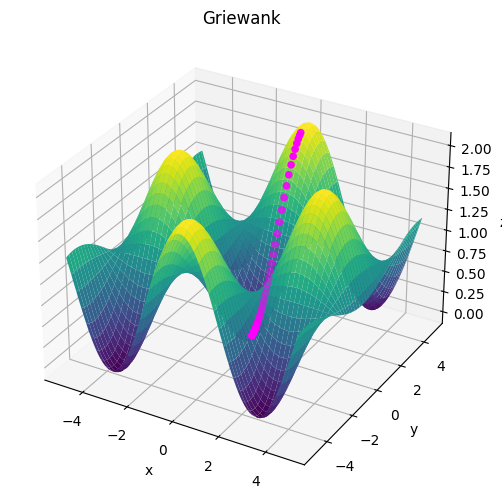

In [9]:
func = griewank
grad = grad_griewank
domain = (-5, 5)
resolution = 0.1
start = (0, 4)
lr = 0.1
t = 100

plot("Griewank", func, grad, domain, resolution, start, lr, t)

# Tests

### Rastrigin

In [13]:
s = (-2.75, -0.26)

func = rastrigin
grad = grad_rastrigin

LR = [0.1, 0.01, 0.001]
T = [10, 100, 1000]

results = {}

for lr in LR:
    for t in T:
        optimizer = GradientDescent(func, grad, s[0], s[1], lr, t)
        optimum = optimizer.run()
        result_key = f"lr={lr}, t={t}, start={s}"
        results[result_key] = func(optimum[0], optimum[1])

# Analyze results
best_params = min(results, key=results.get)
best_result = results[best_params]

worst_params = max(results, key=results.get)
worst_result = results[worst_params]

print("Best parameters:", best_params)
print("Best result:", best_result)
print()
print("Worst parameters:", worst_params)
print("Worst result:", worst_result)
        

Best parameters: lr=0.01, t=10, start=(-2.75, -0.26)
Best result: 17.441618284862013

Worst parameters: lr=0.1, t=10, start=(-2.75, -0.26)
Worst result: 871.3127424420851


In [14]:
s = (-0.29, -4.78)

func = griewank
grad = grad_griewank

LR = [1, 0.1, 0.01, 0.001]
T = [10, 100, 1000]

results = {}

for lr in LR:
    for t in T:
        optimizer = GradientDescent(func, grad, s[0], s[1], lr, t)
        optimum = optimizer.run()
        result_key = f"lr={lr}, t={t}, start={s}"
        results[result_key] = func(optimum[0], optimum[1])

# Analyze results
best_params = min(results, key=results.get)
best_result = results[best_params]

worst_params = max(results, key=results.get)
worst_result = results[worst_params]

print("Best parameters:", best_params)
print("Best result:", best_result)
print()
print("Worst parameters:", worst_params)
print("Worst result:", worst_result)
        

Best parameters: lr=0.001, t=10, start=(-0.29, -4.78)
Best result: 1.9382651949321712

Worst parameters: lr=0.1, t=1000, start=(-0.29, -4.78)
Worst result: 2.0048932560197574


In [12]:
def test_start_points(name, func, grad, S, lr, t, global_min):
    results = []
    for s in S:
        optimizer = GradientDescent(func, grad, s[0], s[1], lr, t)
        optimum = optimizer.run()
        results.append(func(optimum[0], optimum[1]))
    
    print(f"[{name}] stddev for random initialization points:", np.std(results))

S = [(random.randrange(-512, 512)/100.0, random.randrange(-512, 512)/100.0) for i in range(1000)]
test_start_points("rastrigin", rastrigin, grad_rastrigin, S, 0.01, 100, RASTRIGIN_MIN)


S = [(random.randrange(-500, 500)/100.0, random.randrange(-500, 500)/100.0) for i in range(1000)]
test_start_points("griewank", griewank, grad_griewank, S, 0.01, 100, RASTRIGIN_MIN)


[rastrigin] stddev for random initialization points: 14.465869735591864
[griewank] stddev for random initialization points: 0.5642634928780453
